In [380]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [381]:
item_category_df = pd.read_csv("data/item_categories.csv")
items_df = pd.read_csv("data/items.csv")
shops_df = pd.read_csv("data/shops.csv")
sample_df = pd.read_csv("data/sample_submission.csv")
train_df = pd.read_csv("data/sales_train_v2.csv")
test_df = pd.read_csv("data/test.csv")

In [382]:
item_category_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [383]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [384]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [385]:
sample_df.head()
# 제출할 때의 양식 파일. 무시해도 상관x

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [386]:
train_df.head()
# 가장 중요한 데이터가 아닐까 싶다.

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [387]:
train_df.shape

(2935849, 6)

In [388]:
test_df.head()
# 모델이 잘 구성이 되었는지 Test하는 샘플. Train과정에서는 약간 불필요

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [389]:
item_category_df.shape

(84, 2)

In [390]:
items_df.shape

(22170, 3)

In [391]:
shops_df.shape

(60, 2)

In [392]:
train_df.shape

(2935849, 6)

In [393]:
np.sort(train_df["item_cnt_day"].unique()).astype(np.int32)

array([ -22,  -16,   -9,   -6,   -5,   -4,   -3,   -2,   -1,    1,    2,
          3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
         14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,
         25,   26,   27,   28,   29,   30,   31,   32,   33,   34,   35,
         36,   37,   38,   39,   40,   41,   42,   43,   44,   45,   46,
         47,   48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
         58,   59,   60,   61,   62,   63,   64,   65,   66,   67,   68,
         69,   70,   71,   72,   73,   74,   75,   76,   77,   78,   79,
         80,   81,   82,   83,   84,   85,   86,   87,   88,   89,   90,
         91,   92,   93,   95,   96,   97,   98,   99,  100,  101,  102,
        103,  104,  105,  106,  107,  108,  109,  110,  111,  112,  113,
        114,  115,  116,  117,  118,  121,  124,  126,  127,  128,  129,
        130,  131,  132,  133,  134,  135,  138,  139,  140,  142,  145,
        146,  147,  148,  149,  150,  151,  153,  1

In [394]:
train_df["item_cnt_day"].mean()

1.242640885140891

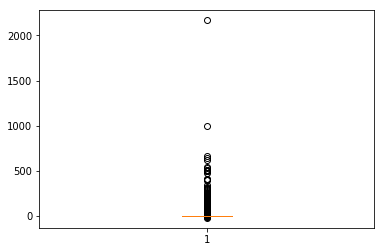

In [395]:
plt.boxplot(train_df["item_cnt_day"])
plt.show()

In [396]:
f = lambda x: x.split(".")
train_df['date_test'] =list(map(f, train_df['date']))
train_df['date_test'].head()

0    [02, 01, 2013]
1    [03, 01, 2013]
2    [05, 01, 2013]
3    [06, 01, 2013]
4    [15, 01, 2013]
Name: date_test, dtype: object

In [397]:
f = lambda x: x[2]+"."+x[1]
train_df['date_test'] =list(map(f, train_df['date_test']))
train_df['date_test'].head()

0    2013.01
1    2013.01
2    2013.01
3    2013.01
4    2013.01
Name: date_test, dtype: object

In [398]:
# bins=[-1,3,5,8,10,15,17,20,22,27,29,32,35]
# group_names=["2012.Winter","2013.Spring","2013.Summer","2013.Fall","2013.Winter","2014.Spring","2014.Summer","2014.Fall",\
#              "2014.Winter","2015.Spring","2015.Summer","2015.Fall"]
# train_df["date_test"]=pd.cut(train_df["date_block_num"],bins,labels=group_names)
# # train_index = train_df["date_test"].unique()
# # train_index

In [399]:
train_vlm = train_df.groupby("date_test")["item_cnt_day"].sum()
train_vlmct = train_df.groupby("date_test")["item_cnt_day"].count()
train_max = train_df.groupby("date_test")["item_cnt_day"].mean()
train_new = pd.concat([train_vlm, train_vlmct, train_max],axis=1)
train_index = train_df["date_test"].unique()

In [400]:
train = train_new.as_matrix()
train.shape

(34, 3)

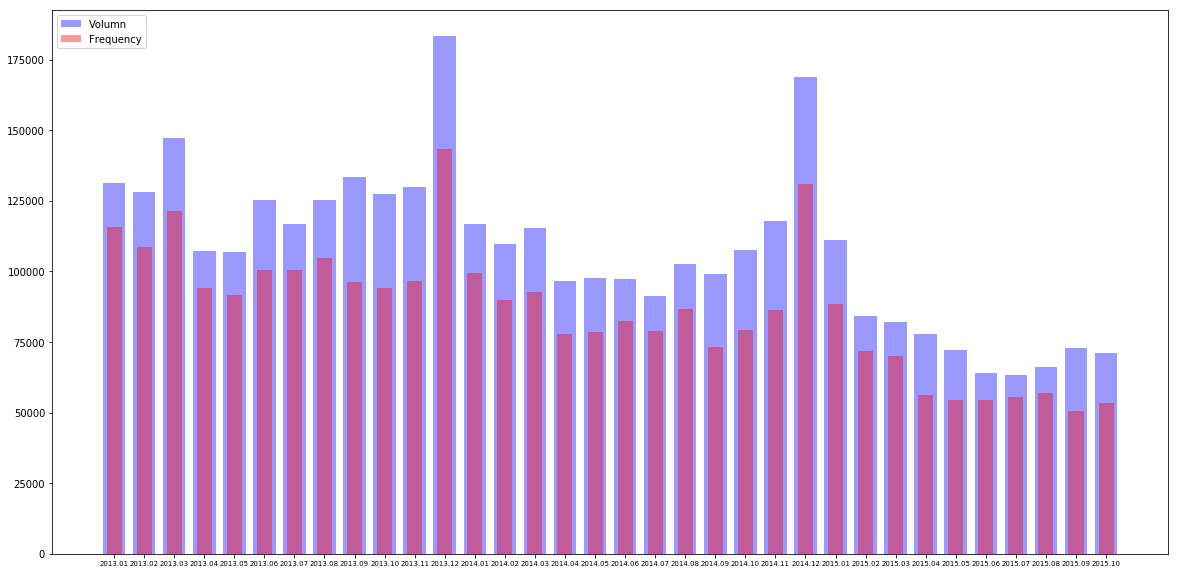

In [404]:
fig = plt.figure()
fig.set_size_inches(20,10)
X=np.arange(34)
plt.bar(X+0, train[:,0],color="b",width=0.75,alpha=0.4, label="Volumn")
plt.bar(X+0, train[:,1],color="r",width=0.50,alpha=0.4, label="Frequency")
plt.xticks(X, train_index,size=7)
plt.legend(loc="upper left")
plt.show()

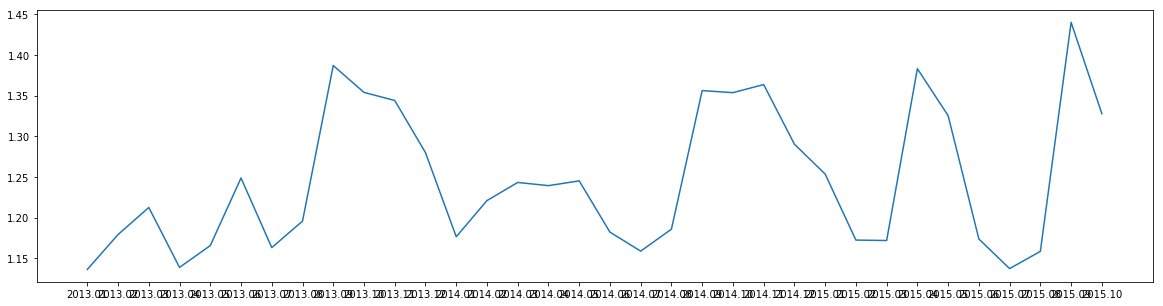

In [403]:
fig = plt.figure()
fig.set_size_inches(20,5)
plt.plot(X,train[:,2])
plt.xticks(X, train_index)
plt.show()

## 이상치 처리

In [368]:
train_e = train_df.drop("date_test",axis=1)
train_e.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [358]:
f = lambda x: x.split(".")
train_e['date'] =list(map(f, train_e['date']))

In [359]:
f = lambda x: x[1]
train_e['month'] =list(map(f, train_e['date']))

In [360]:
train_e = train_e.drop(['date'],axis=1)

In [361]:
train_e

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
0,0,59,22154,999.00,1.0,01
1,0,25,2552,899.00,1.0,01
2,0,25,2552,899.00,-1.0,01
3,0,25,2554,1709.05,1.0,01
4,0,25,2555,1099.00,1.0,01
5,0,25,2564,349.00,1.0,01
6,0,25,2565,549.00,1.0,01
7,0,25,2572,239.00,1.0,01
8,0,25,2572,299.00,1.0,01
9,0,25,2573,299.00,3.0,01


In [362]:
test = train_e["item_cnt_day"].as_matrix()
condition = test>100
test[condition]

array([ 200.,  107.,  150.,  217.,  104.,  168.,  156.,  264.,  110.,
        133.,  148.,  106.,  109.,  102.,  288.,  171.,  131.,  151.,
        113.,  118.,  127.,  168.,  135.,  103.,  111.,  242.,  105.,
        104.,  126.,  101.,  194.,  255.,  121.,  405.,  300.,  401.,
        502.,  138.,  134.,  133.,  240.,  171.,  130.,  115.,  104.,
        164.,  112.,  501.,  151.,  103.,  251.,  103.,  101.,  124.,
        149.,  132.,  195.,  512.,  124.,  151.,  401.,  508.,  130.,
        101.,  412.,  313.,  106.,  128.,  142.,  163.,  108.,  147.,
        167.,  142.,  107.,  500.,  205.,  153., 1000.,  222.,  124.,
        110.,  110.,  110.,  116.,  115.,  313.,  325.,  127.,  171.,
        207.,  121.,  111.,  129.,  231.,  114.,  116.,  103.,  299.,
        138.,  145.,  117.,  624.,  108.,  104.,  148.,  134.,  110.,
        187.,  140.,  480.,  343.,  539.,  205.,  117.,  106.,  230.,
        179.,  151.,  150.,  121.,  126.,  145.,  154.,  533.,  139.,
        637.,  151.,

In [363]:
np.where(test>100)

(array([ 566159,  620237,  836296,  845690,  845703,  853771,  858692,
         862929,  862945,  868495,  871347,  884437,  884460,  887356,
         890790,  890809,  903259,  927373,  944059,  949279,  963528,
        1014331, 1015280, 1058292, 1058296, 1058340, 1058343, 1058422,
        1058429, 1107225, 1170070, 1170072, 1464033, 1501160, 1549966,
        1573252, 1573253, 1582402, 1586766, 1612509, 1618930, 1650935,
        1650986, 1651692, 1652814, 1686924, 1703732, 1708207, 1710946,
        1737941, 1782715, 1821033, 1865521, 2014171, 2014237, 2014238,
        2048497, 2048518, 2050285, 2067628, 2067667, 2067669, 2067670,
        2067676, 2067677, 2137371, 2137663, 2137664, 2144362, 2144509,
        2144548, 2176634, 2185126, 2190983, 2237669, 2257299, 2296209,
        2325698, 2326930, 2341308, 2387453, 2387459, 2387494, 2387501,
        2405362, 2405466, 2406023, 2406117, 2532946, 2555809, 2567454,
        2568846, 2571344, 2578897, 2578940, 2578955, 2578956, 2584622,
      

In [364]:
test = train_e["item_cnt_day"].as_matrix()
test = np.where(test>10)
test = test[0]
len(test)

10116

In [ ]:
train_df["item_cnt_day"].where(train_df["item_cnt_day"] >10)